In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from bandit_learn import *

/home/chris/Developer/tweet-stock-prediction/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
n_sim = 1
noise_std = 0.1
n_arms=10
n_features=10
confidence_scaling_factor = noise_std

SEED = 42
np.random.seed(SEED)

In [5]:
fl = FeatureLoader(
    datasetDir="../data/TSLA_2020_2022/processed_data/",
    featuresDir="../data/TSLA_2020_2022/features/",
    n_arms=10,
    n_features=10,
)
fl.loadFeatures(0.1)
print(fl.T)
T = fl.T

TypeError: loadFeatures() takes 1 positional argument but 2 were given

In [ ]:
stockLoader = StockLoader("TSLA")
stockLoader.LoadStock(
    columns=['Open', 'High', 'Low', 'Close'],
    start='2019-08-21', end='2022-05-12',
    dir='../data/TSLA_2020_2022/stock_data/',
    days=2,
)
stockLoader.saveStock()

Writing file to ../data/TSLA_2020_2022/stock_data/TSLA_2019-08-21_2022-05-12_2.csv


In [ ]:
stockLoader.df.loc["2021-02-02",'tslaclose']

872.7899780273438

In [ ]:
fl.features_df.columns

Index(['Unnamed: 0', 'date', 'features', 'inference', 'confidence'], dtype='object')

In [ ]:
b = ContextualBandit(
    T=fl.T, n_arms=fl.n_arms, n_features=fl.n_features, feature_loader=fl, stock_loader=stockLoader, seed=SEED
)

[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  1.3s
get rewards ...
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  2.0s
[########################################] | 100% Completed |  1.9s


In [ ]:
# b.best_actions_oracle[0:10].compute(), b.best_rewards_oracle[0:10].compute(), b.rewards[0:10].compute()

(array([0, 1, 6, 1, 6, 6, 0, 0, 0, 0]),
 array([0.00676989, 0.02795008, 0.06121694, 0.16060121, 0.0817465 ,
        0.08242662, 0.04308052, 0.11674527, 0.13706012, 0.20476064]),
 array([array([ 0.00676989, -0.00777787, -0.00777787, -0.00777787,  0.00676989,
                0.00676989, -0.00777787,  0.00676989, -0.00777787,  0.00676989]),
        array([-0.02708491,  0.02795008, -0.02791496, -0.02657542,  0.01730615,
               -0.0280892 ,  0.02767395,  0.02795008, -0.0280892 , -0.02657542]),
        array([-0.04593079, -0.06121694,  0.05016078,  0.05016078,  0.05016078,
                0.05016078,  0.06121694, -0.06121694,  0.05016078, -0.04593079]),
        array([0.1034325 , 0.16060121, 0.1034325 , 0.1034325 , 0.1034325 ,
               0.16060121, 0.16060121, 0.1034325 , 0.1034325 , 0.16060121]),
        array([-0.0817465, -0.0817465, -0.0817465, -0.0817465, -0.0817465,
               -0.0817465,  0.0817465, -0.0817465, -0.0817465, -0.0817465]),
        array([-0.08242662, -0.0

In [ ]:
regrets = np.empty((1, T))

model = LinUCB(
    b,
    reg_factor=1.0,
    delta=0.1,
    confidence_scaling_factor=confidence_scaling_factor,
)
model.run()
regrets = np.cumsum(model.regrets)

600it [09:26,  1.06it/s, total regret=17.7, % optimal arm=13.57%]                         


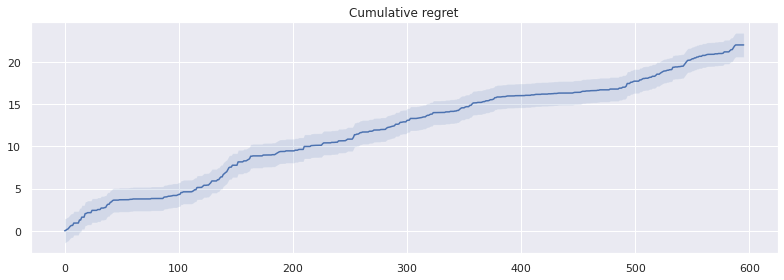

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)
# mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(regrets)
# ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.fill_between(t, regrets - 6*std_regrets, regrets + 6*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

# fig.savefig('figures/linucb_linear.pdf')